In [7]:
%matplotlib inline

import random
import numpy as np
import itertools as it
import matplotlib.pyplot as plt


'''
Definicion bubble sort
'''
def bubbleSort(A):
    n = len(A)
    finished = False
    comparations = 0
    swaps = 0
    others = 0
    while(not finished):
        comparations = comparations + 1
        finished = True
        others = others + 1
        for i in range(1, n):
            others = others + 1
            comparations = comparations + 1
            if(A[i-1] > A[i]):
                finished = False
                A[i-1], A[i] = A[i], A[i-1]
                swaps = swaps + 1
        n = n - 1
        others = others + 1
    comparations = comparations + 1
    return (comparations, swaps, others)

In [8]:
'''
Funciones auxiliares, graficar, generar todas las permutaciones y generar una sola permutación (para la muestra).
'''
def graph(comparations, swaps, others):
    N = len(comparations)
    print("Average:")
    print("Comparations:", sum(comparations)/N)
    print("Swaps:", sum(swaps)/N)
    print("Others:", sum(others)/N)
    print("Distribucion:")
    plt.hist(comparations,bins='auto')
    plt.title("Histogram of Comparations")
    plt.show()
    plt.hist(swaps,bins='auto')
    plt.title("Histogram of Swaps")
    plt.show()
    plt.hist(others,bins='auto')
    plt.title("Histogram of Others")
    plt.show()
    allOps = comparations + swaps + others
    plt.title("Histogram of all operations")
    plt.hist(allOps, bins='auto')
    plt.show()

'''
Referencia Heap's Algorithm - wikipedia
'''

def generate(n):
    A = list(range(1,n+1))
    c = [0]*n
    yield A
    i = 0
    while i < n:
        if  c[i] < i:
            if i%2 == 0:
                A[0],A[i] = A[i], A[0]
            else:
                A[c[i]],A[i] = A[i], A[c[i]]
            yield A
            c[i] = c[i] + 1
            i = 0
        else:
            c[i] = 0
            i = i + 1

def shuffle(A):
    A = list(A)
    n = len(A)
    for i in range(n-1):
        j = random.randint(i,n-1)
        A[j],A[i] = A[i], A[j]
    return A

In [9]:
'''
Funciones que recoleta los datos y llama la función de graficar.
'''
def allPerms(n, perms):
    comparations = []
    swaps = []
    others = []
    for perm in perms:
        temp = bubbleSort(list(perm))
        comparations = comparations + [temp[0]]
        swaps = swaps + [temp[1]]
        others = others + [temp[2]]
    graph(comparations, swaps, others)

def samplePerms(n, m, rnd):
    comparations = []
    swaps = []
    others = []
    rng = range(n)
    for i in range(m):
        nxt = rnd(rng)
        temp = bubbleSort(nxt)
        comparations = comparations + [temp[0]]
        swaps = swaps + [temp[1]]
        others = others + [temp[2]]
    graph(comparations, swaps, others)

Average:
Comparations: 13.866666666666667
Swaps: 5.0
Others: 16.475
Distribucion:


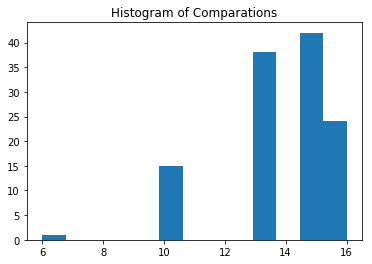

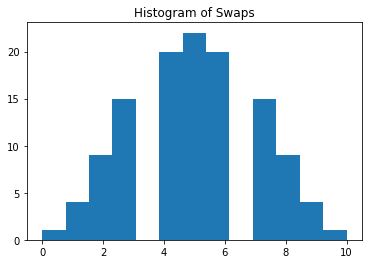

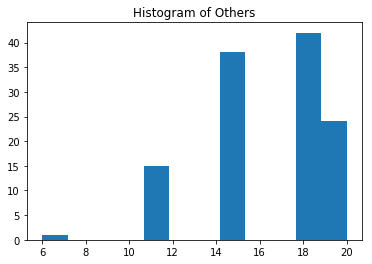

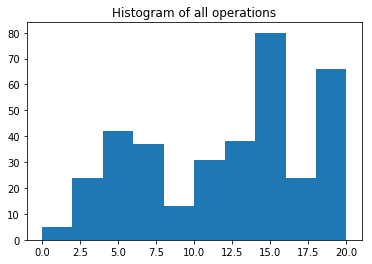

In [12]:
n = 5
allPerms(n,it.permutations(range(n)))
#allPerms(n,generate(n))

Se observa una distribución normal en cada una de las variables.

El limite para una memoria RAM de 6Gb en la generación de todas las permutaciones es 11, más de 8 ya se demoran mucho.

Average:
Comparations: 197.9374
Swaps: 94.8161
Others: 212.8668
Distribucion:


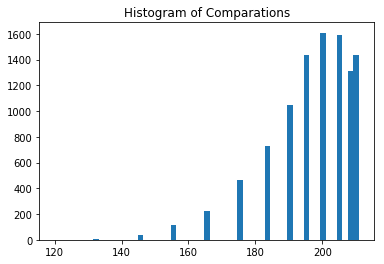

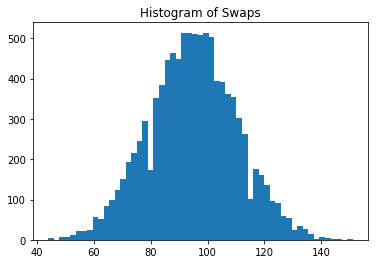

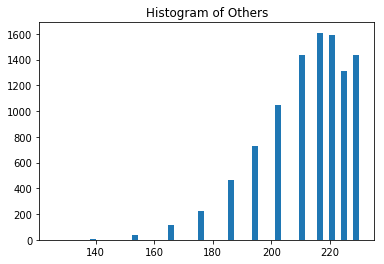

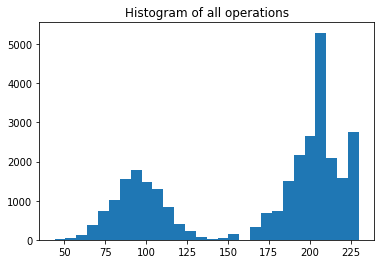

In [11]:
n = 20
samples = 10000
samplePerms(n, samples, shuffle)
#samplePerms(n, samples, np.random.permutation)